In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'dataset/my_dataset.csv'
model_save_path = 'model.hdf5'
tflite_save_path = 'model.tflite'

In [3]:
NUM_CLASSES = 2

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='sigmoid')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [20]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
59/59 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9979
Epoch 00001: saving model to model.hdf5
59/59 [==============================] - 1s 11ms/step - loss: 0.0088 - accuracy: 0.9979 - val_loss: 8.7806e-04 - val_accuracy: 1.0000
Epoch 2/1000
51/59 [========================>.....] - ETA: 0s - loss: 0.0105 - accuracy: 0.9963
Epoch 00002: saving model to model.hdf5
59/59 [==============================] - 1s 9ms/step - loss: 0.0102 - accuracy: 0.9964 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 3/1000
57/59 [===========================>..] - ETA: 0s - loss: 0.0111 - accuracy: 0.9964
Epoch 00003: saving model to model.hdf5
59/59 [==============================] - 1s 9ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 4/1000
52/59 [=========================>....] - ETA: 0s - loss: 0.0093 - accuracy: 0.9967
Epoch 00004: saving model to model.hdf5
59/59 [==============================] - 0s 8ms/step - loss: 0.0

In [22]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.9996


In [23]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [24]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.5823654e-06 9.9443769e-01]
1


In [25]:
print(np.array([X_test[0]]))

[[ 0.          0.         -0.06910387  0.03807533 -0.13597548  0.02409518
  -0.17214972 -0.02321929 -0.18812591 -0.07152349 -0.17303145  0.03161645
  -0.24770659  0.00742948 -0.29102433 -0.00250322 -0.3246907  -0.01043183
  -0.16334194 -0.01839209 -0.23907727 -0.06848931 -0.28433847 -0.1026693
  -0.31674117 -0.13273382 -0.14263839 -0.06768    -0.18537557 -0.11411691
  -0.16537917 -0.09723389 -0.14277029 -0.07733154 -0.11712173 -0.11108351
  -0.14680922 -0.13411492 -0.13059038 -0.11815184 -0.11220381 -0.10352093]]


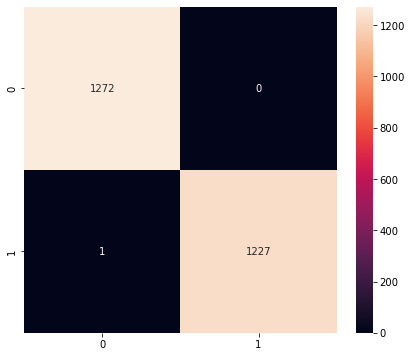

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1228

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)